In [75]:
import pandas as pd
import numpy as np 

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import model_selection 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LassoCV, Perceptron, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix

In [2]:
SEED = 1
np.random.seed(SEED)

# Definimos la carpeta donde se encuentran los datos

data_folder = "data/"

data_training = data_folder + "adult.data"
data_test = data_folder + "adult.test"

# Fijamos una lista de las columnas que tienen nuestros datos 
# de esta manera tenemos mas informaicion en los dataframes de 
# pandas

headers = [
    "age", 
    "workclass", 
    "fnlwgt", 
    "education", 
    "education-num", 
    "marital-status", 
    "occupation", 
    "relationship", 
    "race", 
    "sex", 
    "capital-gain",
    "captial-loss", 
    "hours-per-week", 
    "native-country", 
    "income"
]

# leemos los datos desde el archivo de datos. Este tiene irregularidades
# en el formato, ya que hemos visto que a veces las variables se separan 
# con espacios y otras no. Hemos optados por usar una expresión regular para solverntar
# este problema

df_train = pd.read_csv(data_training, index_col=False, delimiter=",", names=headers)
df_test = pd.read_csv(data_test, index_col=False, delimiter=",", names=headers)

# combinamos los datos que tenemos en un solo conjunto para realizar
# el limpiado de datos

df = pd.concat([df_train,df_test], ignore_index=True)

In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,captial-loss,hours-per-week,native-country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
48839,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
48840,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
48841,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [4]:
df = df.replace('?', np.NaN)
df = df.replace(' ?', np.NaN)

# mostramos el numero de valores null que hay en el dataset
print("Numero de valores perdidos en el conjunto de datos: {}".format(
    df.isnull().sum(axis=0).sort_values(ascending = False).head(30)))

# sustituimos los valores de income por etiquetas 0 y 1


df['income'] = df['income'].str.strip()
df['income'] = df['income'].str.replace(".", "")
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

Numero de valores perdidos en el conjunto de datos: occupation        2810
workclass         2800
native-country     858
income               1
hours-per-week       1
captial-loss         1
capital-gain         1
sex                  1
race                 1
relationship         1
marital-status       1
education-num        1
education            1
fnlwgt               1
age                  0
dtype: int64


In [5]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,captial-loss,hours-per-week,native-country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0.0
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0.0
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0.0
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0.0
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,0.0
48839,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,0.0
48840,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,0.0
48841,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,0.0


In [6]:
# mostramos el numero de valores null que hay en el dataset
print("Numero de valores perdidos en el conjunto de datos: {}".format(
    df.isnull().sum(axis=0).sort_values(ascending = False).head(30)))


Numero de valores perdidos en el conjunto de datos: occupation        2810
workclass         2800
native-country     858
income               1
hours-per-week       1
captial-loss         1
capital-gain         1
sex                  1
race                 1
relationship         1
marital-status       1
education-num        1
education            1
fnlwgt               1
age                  0
dtype: int64


In [7]:
print("Numero de datos de cada clase")
print(df.income.value_counts())

Numero de datos de cada clase
0.0    37155
1.0    11687
Name: income, dtype: int64


[Text(0, 0, '<=50K'), Text(0, 0, '>50K')]

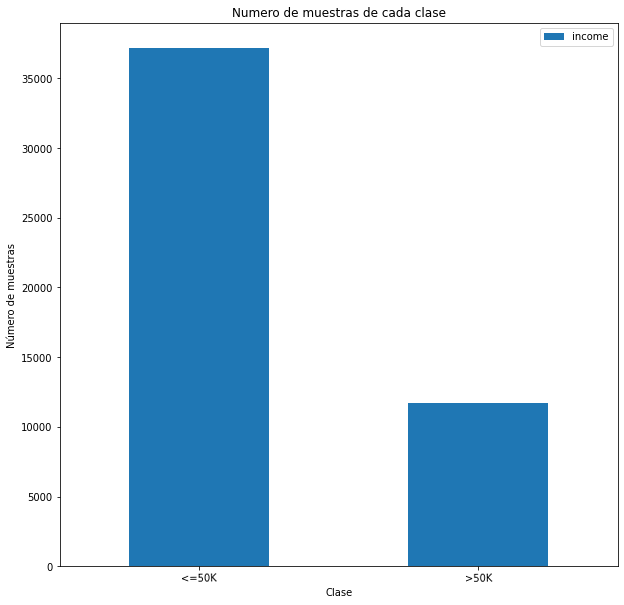

In [8]:
plot = df.income.value_counts().plot(kind="bar", title="Numero de muestras de cada clase", legend=True, figsize=(10,10))
plot.set_xlabel("Clase")
plot.set_ylabel("Número de muestras")
plot.set_xticklabels( ('<=50K', '>50K'), rotation=1)

In [9]:
df = df.drop(['fnlwgt'], axis=1)
df = df.drop(['education-num'], axis=1)

In [10]:
cols_with_categories = [
    'workclass', 
    'education',
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country"
]

In [11]:
# Trabajar con los datos perdidos

print("Datos perdidos por columnas: ")
print(df.isnull().sum(axis=0).sort_values(ascending = False).head(15))
print("\nDatos perdidos por filas: ")
print(df.isnull().sum(axis=1).sort_values(ascending = False).head(15))

Datos perdidos por columnas: 
occupation        2810
workclass         2800
native-country     858
income               1
hours-per-week       1
captial-loss         1
capital-gain         1
sex                  1
race                 1
relationship         1
marital-status       1
education            1
age                  0
dtype: int64

Datos perdidos por filas: 
32561    12
45138     3
20480     3
34722     3
3579      3
43070     3
39362     3
20333     3
35636     3
12996     3
3834      3
35174     3
23915     3
32525     3
30369     3
dtype: int64


In [12]:
df2 = df.copy()
print(df2.shape)
df.dropna(thresh=df.shape[1]-1, inplace=True, axis=0)
print(df.isnull().sum(axis=1).sort_values(ascending = False))
print(df.isnull().sum(axis=0).sort_values(ascending = False).head(30))

(48843, 13)
29888    1
37713    1
40004    1
28500    1
29786    1
        ..
32391    0
32390    0
32389    0
32388    0
0        0
Length: 46043, dtype: int64
native-country    811
occupation         10
income              0
hours-per-week      0
captial-loss        0
capital-gain        0
sex                 0
race                0
relationship        0
marital-status      0
education           0
workclass           0
age                 0
dtype: int64


In [13]:
s = df["native-country"].value_counts(normalize=True)
missing = df["native-country"].isnull()
df.loc[missing,"native-country"] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

s = df["occupation"].value_counts(normalize=True)
missing = df["occupation"].isnull()
df.loc[missing,"occupation"] = np.random.choice(s.index, size=len(df[missing]),p=s.values)
print(df.isnull().sum(axis=1).sort_values(ascending = False))
print(df.isnull().sum(axis=0).sort_values(ascending = False).head(30))

48842    0
16248    0
16268    0
16267    0
16266    0
        ..
32523    0
32522    0
32521    0
32520    0
0        0
Length: 46043, dtype: int64
income            0
native-country    0
hours-per-week    0
captial-loss      0
capital-gain      0
sex               0
race              0
relationship      0
occupation        0
marital-status    0
education         0
workclass         0
age               0
dtype: int64


In [14]:
print("Tamaño antes del conjunto de datos antes de recodificar las variables: {}".format(df.shape))
df = pd.get_dummies(data=df, columns=cols_with_categories)
print("Tamaño antes del conjunto de datos despues de recodificar las variables: {}".format(df.shape))

Tamaño antes del conjunto de datos antes de recodificar las variables: (46043, 13)
Tamaño antes del conjunto de datos despues de recodificar las variables: (46043, 104)


In [15]:
df

,age,capital-gain,captial-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,2174.0,0.0,40.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,0.0,0.0,13.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,0.0,0.0,40.0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,0.0,0.0,40.0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0.0,0.0,40.0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,33,0.0,0.0,40.0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48838,39,0.0,0.0,36.0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48840,38,0.0,0.0,50.0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48841,44,5455.0,0.0,40.0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
X, y = df[df.columns.difference(['income'])], df['income']
X, y = shuffle(X, y, random_state=SEED)
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.8, stratify=y)

In [58]:
preproc = [
    ("var", VarianceThreshold(0.01)),   
    ("standardize", StandardScaler()),      
    ("lasso", SelectFromModel(estimator=LassoCV(tol=0.01))),
]

In [59]:
p = Pipeline(preproc)

In [60]:
x_train_prep = p.fit_transform(train_x, train_y)
print("Descripción de los datos antes y después del preprocesado")
print("Antes: {}".format(train_x.shape))
print("Despues: {}".format(x_train_prep.shape))

Descripción de los datos antes y después del preprocesado
Antes: (9208, 103)
Despues: (9208, 48)


In [25]:
# Modelo lineal

preproc_lin = [
    ("var", VarianceThreshold(0.01)),   
    ("standardize", StandardScaler()),      
    ("poly",PolynomialFeatures(1)), 
    ("lasso", SelectFromModel(estimator=LassoCV(tol=0.01))),
]

pipe_lineal = Pipeline(steps=preproc_lin+[('estimator', LogisticRegression())])
params_lineal = {
    'estimator':[LogisticRegression(max_iter=500)],
    'estimator__solver':['lbfgs'],
    'estimator__C': np.logspace(-6, 6, 4),
    'estimator__penalty': ['l2'],
    'poly__degree': [1,2],
    'estimator__tol': [1e-3, 1e-4, 1e-2]
}
best_clf_lin = GridSearchCV(pipe_lineal, params_lineal, scoring = 'f1',cv = 5, n_jobs = -1, verbose=1)

In [26]:
best_clf_lin.fit(train_x, train_y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  5.0min finished
/home/yabirgb/Documents/uni/Proyecto-Final---AA/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('var',
                                        VarianceThreshold(threshold=0.01)),
                                       ('standardize', StandardScaler()),
                                       ('poly', PolynomialFeatures(degree=1)),
                                       ('lasso',
                                        SelectFromModel(estimator=LassoCV(tol=0.01))),
                                       ('estimator', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'estimator': [LogisticRegression(C=100.0, max_iter=500,
                                                          tol=0.001)],
                         'estimator__C': array([1.e-06, 1.e-02, 1.e+02, 1.e+06]),
                         'estimator__penalty': ['l2'],
                         'estimator__solver': ['lbfgs'],
                         'estimator__tol': [0.001, 0.0001, 0.01],
                         'poly__degree': [1, 2]},
     

In [27]:
best_clf_lin.best_params_

{'estimator': LogisticRegression(C=100.0, max_iter=500, tol=0.001),
 'estimator__C': 100.0,
 'estimator__penalty': 'l2',
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.001,
 'poly__degree': 2}

In [64]:
print("Precisión en training:", round(100.0 * best_clf_lin.score(train_x, train_y), 5))
print("Precisión en test: ", round(100.0 * best_clf_lin.score(test_x, test_y),5))

Precisión en training: 72.37175
Precisión en test:  66.40552


In [29]:
# Random Forest
pipe_lineal = Pipeline(steps=preproc+[('estimator', RandomForestClassifier(random_state = SEED))])
params_lineal = {
    'estimator':[RandomForestClassifier(random_state = SEED)],
    'estimator__criterion': ['gini','entropy'],
    'estimator__max_features': ['sqrt'],
    'estimator__bootstrap':['True'],
    'estimator__min_samples_split': [2,3,4,5]
}
best_clf_random = GridSearchCV(pipe_lineal, params_lineal, scoring = 'f1',cv = 5, n_jobs = -1, verbose=1)

In [30]:
best_clf_random.fit(train_x, train_y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    8.9s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('var',
                                        VarianceThreshold(threshold=0.01)),
                                       ('standardize', StandardScaler()),
                                       ('lasso',
                                        SelectFromModel(estimator=LassoCV(tol=0.01))),
                                       ('estimator',
                                        RandomForestClassifier(random_state=1))]),
             n_jobs=-1,
             param_grid={'estimator': [RandomForestClassifier(bootstrap='True',
                                                              max_features='sqrt',
                                                              min_samples_split=5,
                                                              random_state=1)],
                         'estimator__bootstrap': ['True'],
                         'estimator__criterion': ['gini', 'entropy'],
                         'estimat

In [31]:
best_clf_random.best_params_

{'estimator': RandomForestClassifier(bootstrap='True', max_features='sqrt',
                        min_samples_split=5, random_state=1),
 'estimator__bootstrap': 'True',
 'estimator__criterion': 'gini',
 'estimator__max_features': 'sqrt',
 'estimator__min_samples_split': 5}

In [68]:
print("Precisión en training:", round(100.0 * best_clf_random.score(train_x, train_y),5))
print("Precisión en test: ", round(100.0 * best_clf_random.score(test_x, test_y),5))

Precisión en training: 90.33432
Precisión en test:  66.77672


In [51]:
# Perceptron
pipe_perceptron = Pipeline(steps=preproc_lin+[('estimator', Perceptron(random_state = SEED))])
params_perceptron = {
    'estimator':[Perceptron(random_state = SEED)],
    'estimator__alpha':[1.0, 1e-2, 1e-3, 1e-4, 2, 5],
    'estimator__max_iter':[2000],
    'estimator__tol': np.logspace(-6, 1, 3),
    'estimator__shuffle': [True],
    'poly__degree': [1,2]
}
best_clf_perceptron = GridSearchCV(pipe_perceptron, params_perceptron, scoring = 'f1',cv = 5, n_jobs = -1, verbose=1)# 

In [52]:
best_clf_perceptron.fit(train_x, train_y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  7.3min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('var',
                                        VarianceThreshold(threshold=0.01)),
                                       ('standardize', StandardScaler()),
                                       ('poly', PolynomialFeatures(degree=1)),
                                       ('lasso',
                                        SelectFromModel(estimator=LassoCV(tol=0.01))),
                                       ('estimator',
                                        Perceptron(random_state=1))]),
             n_jobs=-1,
             param_grid={'estimator': [Perceptron(alpha=1.0, max_iter=2000,
                                                  random_state=1, tol=1e-06)],
                         'estimator__alpha': [1.0, 0.01, 0.001, 0.0001, 2, 5],
                         'estimator__max_iter': [2000],
                         'estimator__shuffle': [True],
                         'estimator__tol': array([1.00000000e-06, 3.16227766

In [66]:
print("Precisión en training:", round(100.0 * best_clf_perceptron.score(train_x, train_y),5))
print("Precisión en test: ", round(100.0 * best_clf_perceptron.score(test_x, test_y),5))

Precisión en training: 58.02626
Precisión en test:  57.23819


In [54]:
best_clf_perceptron.best_params_

{'estimator': Perceptron(alpha=1.0, max_iter=2000, random_state=1, tol=1e-06),
 'estimator__alpha': 1.0,
 'estimator__max_iter': 2000,
 'estimator__shuffle': True,
 'estimator__tol': 1e-06,
 'poly__degree': 1}

In [41]:
# MLP
pipe_MLP = Pipeline(steps=preproc+[('estimator', MLPClassifier(random_state = SEED))])
params_MLP = {
    'estimator__activation': ['logistic', 'tanh', 'relu'],
    'estimator__solver': ['lbfgs'],
    'estimator__alpha': [1.0, 1e-2, 1e-3, 1e-4, 2, 5, 10],
    'estimator__max_fun': [20000]
}
best_clf_mlp = GridSearchCV(pipe_MLP, params_MLP, scoring = 'f1',cv = 5, n_jobs = -1, verbose=1)# 

In [42]:
best_clf_mlp.fit(train_x, train_y)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:  4.1min finished
/home/yabirgb/Documents/uni/Proyecto-Final---AA/env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('var',
                                        VarianceThreshold(threshold=0.01)),
                                       ('standardize', StandardScaler()),
                                       ('lasso',
                                        SelectFromModel(estimator=LassoCV(tol=0.01))),
                                       ('estimator',
                                        MLPClassifier(random_state=1))]),
             n_jobs=-1,
             param_grid={'estimator__activation': ['logistic', 'tanh', 'relu'],
                         'estimator__alpha': [1.0, 0.01, 0.001, 0.0001, 2, 5,
                                              10],
                         'estimator__max_fun': [20000],
                         'estimator__solver': ['lbfgs']},
             scoring='f1', verbose=1)

In [43]:
best_clf_mlp.best_params_

{'estimator__activation': 'logistic',
 'estimator__alpha': 5,
 'estimator__max_fun': 20000,
 'estimator__solver': 'lbfgs'}

In [69]:
print("Precisión en training:", round(100.0 * best_clf_mlp.score(train_x, train_y),5))
print("Precisión en test: ", round(100.0 * best_clf_mlp.score(test_x, test_y),5))

Precisión en training: 74.09133
Precisión en test:  66.60767


In [45]:
best_clf_mlp.best_params_

{'estimator__activation': 'logistic',
 'estimator__alpha': 5,
 'estimator__max_fun': 20000,
 'estimator__solver': 'lbfgs'}

In [46]:
best_clf_mlp.cv_results_

{'mean_fit_time': array([31.11326556, 31.17334919, 31.75682807, 31.64025636, 31.89226537,
        31.85071669, 27.55720878, 31.28721161, 29.3553545 , 29.63539262,
        29.41889334, 29.12743616, 29.03681192, 28.91270432, 22.96084032,
        23.32355189, 23.43970008, 24.43036137, 23.6759016 , 18.83470507,
        17.36485877]),
 'std_fit_time': array([0.76623439, 0.54267133, 1.23424305, 1.21181627, 0.77325879,
        0.50636837, 4.54499796, 1.53515726, 0.6643753 , 0.88650386,
        1.48582689, 0.54685668, 0.55786371, 0.68489658, 0.90757629,
        0.97464259, 1.0993097 , 0.54501507, 0.9434143 , 1.91937814,
        0.28375155]),
 'mean_score_time': array([0.04601889, 0.07057571, 0.05935283, 0.05630927, 0.06534562,
        0.0489749 , 0.04240737, 0.04755592, 0.05063791, 0.05357919,
        0.04712267, 0.04861622, 0.04792061, 0.04730473, 0.04501061,
        0.05756221, 0.04454165, 0.04640245, 0.04424963, 0.0323482 ,
        0.0155498 ]),
 'std_score_time': array([0.00348264, 0.01466

In [47]:
# SVM
pipe_SVM = Pipeline(steps=preproc+[('estimator', SVC(gamma = "scale", kernel="rbf"))])
params_SVM = {
    'estimator__C': [0.1, 1, 2, 5, 7, 10],
}
best_clf_svm = GridSearchCV(pipe_SVM, params_SVM, scoring = 'f1',cv = 5, n_jobs = -1, verbose=1)# 

In [48]:
best_clf_svm.fit(train_x, train_y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   28.4s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('var',
                                        VarianceThreshold(threshold=0.01)),
                                       ('standardize', StandardScaler()),
                                       ('lasso',
                                        SelectFromModel(estimator=LassoCV(tol=0.01))),
                                       ('estimator', SVC())]),
             n_jobs=-1, param_grid={'estimator__C': [0.1, 1, 2, 5, 7, 10]},
             scoring='f1', verbose=1)

In [49]:
best_clf_svm.best_params_

{'estimator__C': 7}

In [70]:
print("Precisión en training:", round(100.0 * best_clf_svm.score(train_x, train_y),5))
print("Precisión en test: ", round(100.0 * best_clf_svm.score(test_x, test_y),5))

Precisión en training: 77.82679
Precisión en test:  64.20312


In [71]:
params_grid = [ {
                'estimator':[LogisticRegression(max_iter=500)],
                'estimator__solver':['lbfgs'],
                'estimator__C': [100],
                'estimator__penalty': ['l2'],
                'estimator__tol': [0.001],
                'poly__degree': [2]
                },
                {
                'estimator': [Perceptron(random_state = SEED)],
                'estimator__alpha': [1.0],
                'estimator__max_iter': [2000],
                'estimator__shuffle': [True],
                'estimator__tol': [1e-06],
                'poly__degree': [1]
                },
                {
                'estimator': [RandomForestClassifier(random_state = SEED)],
                'estimator__criterion': ['entropy'],
                'estimator__max_features': ['sqrt'],
                'estimator__bootstrap':['True'],
                'estimator__min_samples_split': [5]
                },
                {
                'estimator': [MLPClassifier(random_state = SEED)],
                'estimator__activation': ['logistic'],
                'estimator__solver': ['lbfgs'],
                'estimator__alpha': [5],
                'estimator__max_fun': [20000]
                },
                {
                'estimator': [SVC()],
                'estimator__C': [7],
                'estimator__kernel': ['rbf'],
                'estimator__gamma': ['scale']
                }
               # {'estimator':[Any_other_estimator_you_want],
               #  'estimator__valid_param_of_your_estimator':[valid_values]

]

In [72]:
# Best Model
pipe_model = Pipeline(steps=preproc_lin+[('estimator', SVC(gamma = "scale", kernel="rbf"))])

best_clf = GridSearchCV(pipe_model, params_grid, scoring = 'f1',cv = 5, n_jobs = -1, verbose=1)# 

In [73]:
best_clf.fit(train_x, train_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   48.0s finished
/home/yabirgb/Documents/uni/Proyecto-Final---AA/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('var',
                                        VarianceThreshold(threshold=0.01)),
                                       ('standardize', StandardScaler()),
                                       ('poly', PolynomialFeatures(degree=1)),
                                       ('lasso',
                                        SelectFromModel(estimator=LassoCV(tol=0.01))),
                                       ('estimator', SVC())]),
             n_jobs=-1,
             param_grid=[{'estimator': [LogisticRegression(C=100, max_iter=500,
                                                           tol=0.001)],
                          'estimator__C': [100], 'estimato...
                          'estimator__max_features': ['sqrt'],
                          'estimator__min_samples_split': [5]},
                         {'estimator': [MLPClassifier(random_state=1)],
                          'estimator__activation': ['logistic'],
    

In [74]:
best_clf.best_params_

{'estimator': LogisticRegression(C=100, max_iter=500, tol=0.001),
 'estimator__C': 100,
 'estimator__penalty': 'l2',
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.001,
 'poly__degree': 2}

In [76]:
test_pred = best_clf.best_estimator_.predict(test_x)

In [78]:
print(confusion_matrix(test_y, test_pred))

[[25410  2287]
 [ 3459  5679]]


In [81]:
best_clf.cv_results_

{'mean_fit_time': array([45.15931163,  1.26951361,  3.07336278, 26.14345732, 10.11378245]),
 'std_fit_time': array([2.50197571, 0.33514061, 0.18798345, 0.70874343, 1.85163412]),
 'mean_score_time': array([0.03783164, 0.03481932, 0.13790584, 0.03947124, 0.95961223]),
 'std_score_time': array([0.00687727, 0.00447176, 0.02268341, 0.00668379, 0.15140292]),
 'param_estimator': masked_array(data=[LogisticRegression(C=100, max_iter=500, tol=0.001),
                    Perceptron(random_state=1),
                    RandomForestClassifier(random_state=1),
                    MLPClassifier(random_state=1), SVC()],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_estimator__C': masked_array(data=[100, --, --, --, 7],
              mask=[False,  True,  True,  True, False],
        fill_value='?',
             dtype=object),
 'param_estimator__penalty': masked_array(data=['l2', --, --, --, --],
              mask=[False,  True,  Tr

In [84]:
[round(100*x, 5) for x in [0.68426678, 0.61457028, 0.67917218, 0.67618907, 0.65651283]]

[68.42668, 61.45703, 67.91722, 67.61891, 65.65128]